<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW14/20201209_PUS20_Image_CNN_Kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as k

In [ ]:
import glob
import h5py
from PIL import Image

In [ ]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install pillow

In [ ]:
cd /content/drive/Shareddrives/PUS2020/

/content/drive/Shareddrives/PUS2020


In [ ]:
ls

 1-new-york-city-1270751697.jpg
 Cambodia.jpg
 classlogo.ipynb
 cnj.png
'Copy of PUS2020 project proposal - midterm.gdoc'
 ct_shape_MonthlyAve.cpg
 ct_shape_MonthlyAve.dbf
 ct_shape_MonthlyAve.shp
 ct_shape_MonthlyAve.shx
 data/
'Example PUS2020 class quiz.gform'
 FBBianco_data/
 FBianco_data/
 Figures_Defense.jpg
'fxpq-c8ku?method=export&format=Shapefile'
 image_lan.jpg
 imgreconstruct_10000.h5
 imgreconstruct_10000.h5.1
 imgreconstruct_10000.h5.2
 imgreconstruct_10000.h5.3
 imgreconstruct_10000.h5.4
 imgreconstruct_10000.h5.5
 imgreconstruct_10000.h5.6
 inclassquizzes/
 Kyungmin.jpg
 __MACOSX/
 manhattan.zip
 MapPLUTO+2008
 nyc_mappluto_20v5_shp.zip
 Output/
 pearson.jpg
 philadelphia.jpg
'PUS2020 CoC and Github repo.gform'
'PUS2020 project proposal - midterm.gdoc'
 spatialindex-src-1.8.5/
 testDiffSheets.ipynb
 tl_2018_10_tract.cpg
 tl_2018_10_tract.dbf
 tl_2018_10_tract.prj
 tl_2018_10_tract.shp
 tl_2018_10_tract.shp.ea.iso.xml
 tl_2018_10_tract.shp.iso.xml
 tl_2018_10_tract.shx
 t

In [ ]:
ls data

'2010 Census Tracts'/
 201903-citibike-tripdata.csv.zip
 201904-citibike-tripdata.csv.zip
 201905-citibike-tripdata.csv.zip
 201906-citibike-tripdata.csv.zip
 202003-citibike-tripdata.csv.zip
 202004-citibike-tripdata.csv.zip
 202005-citibike-tripdata.csv.zip
 202006-citibike-tripdata.csv.zip
 8230B06B-101B-4DAE-8046CBA2DA056DA6_source.jpg
 arrest_data_daily_by_zip.csv
 citibike/
 citibikes_monthly.csv
 faces95/
 faces.npy
 igfilters.png
 imgreconstruct_10000.h5
 imgreconstruct_5000.h5
 kalbar_drone_190113-768x512.jpg
 kalbar_drone_190195.jpg
 Longitude_Graticules_and_World_Countries_Boundaries-shp/
 Madrid.jpg
 MapPLUTO.cpg
 MapPLUTO.dbf
 MapPLUTO.prj
 MapPLUTO.sbn
 MapPLUTO.sbx
 MapPLUTO.shp
 MapPLUTO.shp.xml
 MapPLUTO.shx
 MNMapPLUTO.dbf
 MNMapPLUTO.prj
 MNMapPLUTO.sbn
 MNMapPLUTO.sbx
 MNMapPLUTO.shp
 MNMapPLUTO.shp.xml
 MNMapPLUTO.shx
 natural_earth_vector/
 New-York-by-Gehry-1-537x368.jpg
'Olympic Park.jpeg'
 philadelphia.jpg
 PLUTODD20v5.pdf
 PlutoReadme20v5.pdf
 PPR_Properties.c

In [ ]:
##!wget http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip
#!unzip faces95.zip

In [ ]:
ls data/faces95/

adhast/        damvo.17.jpg   jserai.5.jpg   ogefen.12.jpg  sgjday.1.jpg
adhast.10.jpg  damvo.18.jpg   jserai.6.jpg   ogefen.13.jpg  sgjday.20.jpg
adhast.11.jpg  damvo.19.jpg   jserai.7.jpg   ogefen.14.jpg  sgjday.2.jpg
adhast.12.jpg  damvo.1.jpg    jserai.8.jpg   ogefen.15.jpg  sgjday.3.jpg
adhast.13.jpg  damvo.20.jpg   jserai.9.jpg   ogefen.16.jpg  sgjday.4.jpg
adhast.14.jpg  damvo.2.jpg    jshea/         ogefen.17.jpg  sgjday.5.jpg
adhast.15.jpg  damvo.3.jpg    jshea.10.jpg   ogefen.18.jpg  sgjday.6.jpg
adhast.16.jpg  damvo.4.jpg    jshea.11.jpg   ogefen.19.jpg  sgjday.7.jpg
adhast.17.jpg  damvo.5.jpg    jshea.12.jpg   ogefen.1.jpg   sgjday.8.jpg
adhast.18.jpg  damvo.6.jpg    jshea.13.jpg   ogefen.20.jpg  sgjday.9.jpg
adhast.19.jpg  damvo.7.jpg    jshea.14.jpg   ogefen.2.jpg   sherbe/
adhast.1.jpg   damvo.8.jpg    jshea.15.jpg   ogefen.3.jpg   sherbe.10.jpg
adhast.20.jpg  damvo.9.jpg    jshea.16.jpg   ogefen.4.jpg   sherbe.11.jpg
adhast.2.jpg   darda/         jshea.17.jpg   ogefen.5

In [ ]:
glob.glob("data/faces95/*jpg")

['data/faces95/jross.9.jpg',
 'data/faces95/jross.10.jpg',
 'data/faces95/jross.11.jpg',
 'data/faces95/jross.12.jpg',
 'data/faces95/jross.13.jpg',
 'data/faces95/jross.14.jpg',
 'data/faces95/jross.15.jpg',
 'data/faces95/jross.16.jpg',
 'data/faces95/jross.17.jpg',
 'data/faces95/jross.18.jpg',
 'data/faces95/jross.19.jpg',
 'data/faces95/jross.20.jpg',
 'data/faces95/jserai.1.jpg',
 'data/faces95/jserai.2.jpg',
 'data/faces95/jserai.3.jpg',
 'data/faces95/jserai.4.jpg',
 'data/faces95/jserai.5.jpg',
 'data/faces95/jserai.6.jpg',
 'data/faces95/jserai.7.jpg',
 'data/faces95/jserai.8.jpg',
 'data/faces95/jserai.9.jpg',
 'data/faces95/jserai.10.jpg',
 'data/faces95/jserai.11.jpg',
 'data/faces95/jserai.12.jpg',
 'data/faces95/jserai.13.jpg',
 'data/faces95/jserai.14.jpg',
 'data/faces95/jserai.15.jpg',
 'data/faces95/jserai.16.jpg',
 'data/faces95/jserai.17.jpg',
 'data/faces95/jserai.18.jpg',
 'data/faces95/jserai.19.jpg',
 'data/faces95/jserai.20.jpg',
 'data/faces95/jshea.1.jpg',
 

In [ ]:
flist = glob.glob("data/faces95/*jpg")

In [ ]:
N = len(flist)
N

1440

# Read in data


((70, 70, 1), 540)

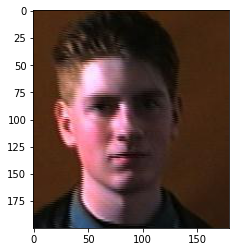

In [ ]:
imgs = Image.open(flist[40])
np_im = numpy.array(imgs)[:,:,:3].astype(float) / 255 #normalize the images so that they are 0-1
pl.imshow(np_im)
np_im[25:165:2,25:165:2,:1].shape, np.prod(np_im.shape[1:])

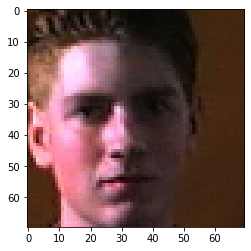

In [ ]:
pl.imshow(np_im[25:165:2,25:165:2])

In [ ]:
# This is the code showing how to download all images and save it 
# Because it will take a long time, this notebook will run the next cell

#imgs = np.zeros((N, 70, 70, 1))
#for i,f in enumerate(flist):
  #if not i%50: print(i)
  #im = Image.open(flist[i])
  #np_im = numpy.array(im)[:,:,:3].astype(float) / 255 
  #imgs[i] = numpy.array(im)[25:165:2,25:165:2,:1].astype(float) / 255 
#np.save("faces.npy", imgs)

# by @FBianco
# here I collect the certain portion of each image 
# from pixel 25 to 165 on the x and y axis (25:165)
# and subsampling by a factor 2 (25:165:2)
# and I am only choosing 1 color layer: [...,:1]: the R in RGB layers

In [ ]:
# For convenience
imgs = np.load("data/faces.npy")
imgs.shape # This is output

(1440, 70, 70, 1)

In [ ]:
imgs.dtype

dtype('float64')

# Lower the resolution

## Make a copy of the original befor lowering the resolution

In [ ]:
#imgs orig is the full resolution image
imgs_orig = imgs.copy()

In [ ]:
# Lower teh resolution
imgs = imgs[:,::2,::2]
imgs[0].shape

(35, 35, 1)

In [ ]:
# This is the number of pixels in the image
np.prod(imgs[0].shape)

1225

## Generate a train and test set 

If I want to predict the image at the same resolution I will pass the same input as the target variable. Otherwise the target variable will be a full resolution image set and the low input the lower resolution one


In [ ]:
imgs = imgs.reshape((1440, 35*35))
imgs_orig = imgs_orig.reshape((1440, 70*70))

###1a. 

In [ ]:
# object = high resolution of the images
# teach how to know low resolution image and predict high resolution 

#from sklearn.model_selection import train_test_split
#X_tr, X_te, y_tr, y_te = train_test_split(imgs, imgs_orig, test_size=0.25, random_state=1)

#(input, output, test size)
# test size 0.75 is typical num

In [ ]:
#X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

#1b.

In [ ]:
SUPERRESOLVE = True

In [ ]:
from sklearn.model_selection import train_test_split
if SUPERRESOLVE:
  X_tr,  X_te, y_tr, y_te = train_test_split(imgs, imgs_orig, 
                                             test_size = .25, random_state=1)
else:
  X_tr,  X_te, y_tr, y_te = train_test_split(imgs, imgs, 
                                             test_size = .25, random_state=1)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((1080, 1225), (360, 1225), (1080, 4900), (360, 4900))

In [ ]:
X_tr = X_tr.reshape(len(X_tr), np.prod(X_tr.shape[1:]))
X_te = X_te.reshape(len(X_te), np.prod(X_te.shape[1:]))
y_tr = y_tr.reshape(len(y_tr), np.prod(y_tr.shape[1:]))
y_te = y_te.reshape(len(y_te), np.prod(y_te.shape[1:]))

In [ ]:
# important: we feed to the NN rows of pixels, not cubes of pixels
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((1080, 1225), (360, 1225), (1080, 4900), (360, 4900))

#Build an autoencoder model

##1a.

In [ ]:
# This is the layer of the neural network
#model = Sequential()
#model.add(Dense(256, activation='relu', input_dim = 1225))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(1225, activation='relu'))
#model.add(Dense(4900, activation='relu'))

#model.summary()

In [ ]:
#model.compile(optimizer='adamax', metrics=["mae", "acc"], loss='mse')

In [ ]:
#model.fit(X_tr, y_tr, epochs=3, batch_size=16, verbose=1)

# you can skip this and load the saved model
#history = model.fit(X_tr, y_tr, epochs=100000, batch_size=16, verbose=1)
#model.save("imgreconstruct_100000PUS.h5")

##1b.

In [ ]:
def create_model(bottleneck=128, input_dim=1225):
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=1225))
  model.add(Dense(128, activation='relu', name="bottleneck"))
  if bottleneck < 128:
    model.add(Dense(bottleneck, activation='relu'))
    model.add(Dense(128, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(1225, activation='relu'))
  model.add(Dense(1225*4, activation='sigmoid'))
  model.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])# optimizer="adadelta", loss="kullback_leibler_divergence")
  return model
model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               313856    
_________________________________________________________________
bottleneck (Dense)           (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1225)              314825    
_________________________________________________________________
dense_3 (Dense)              (None, 4900)              6007400   
Total params: 6,702,001
Trainable params: 6,702,001
Non-trainable params: 0
_________________________________________________________________
None


# A trained model

skip and load the pretrained I saved for you! (as long as you did not change the architecture. or to read in the saved model skip this cell, or skip the whole section and read a model from http://fbb.space/mltsa/imgreconstruct_10000.h5

In [ ]:
# you can skip this and load the saved model
#history = model.fit(X_tr, y_tr, epochs=100000, batch_size=16, verbose=1)
#model.save("imgreconstruct_100000PUS.h5")

In [ ]:
#REad in the saved model
!wget http://fbb.space/mltsa/imgreconstruct_10000.h5
model.load_weights("data/imgreconstruct_10000.h5")

--2020-12-10 03:53:53--  http://fbb.space/mltsa/imgreconstruct_10000.h5
Resolving fbb.space (fbb.space)... 107.180.39.232
Connecting to fbb.space (fbb.space)|107.180.39.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80457300 (77M)
Saving to: ‘imgreconstruct_10000.h5.7’

imgreconstruct_1000 100%[===================>]  76.73M  2.58MB/s    in 24s     

2020-12-10 03:54:17 (3.14 MB/s) - ‘imgreconstruct_10000.h5.7’ saved [80457300/80457300]



#Predict

In [ ]:
outim = model.predict(X_te)
outim

array([[0.23803368, 0.23000248, 0.23300679, ..., 0.14008921, 0.11853015,
        0.09816667],
       [0.30023423, 0.30895784, 0.303142  , ..., 0.2479376 , 0.24314575,
        0.25033206],
       [0.23010811, 0.2288801 , 0.23590074, ..., 0.15398994, 0.1522227 ,
        0.15035805],
       ...,
       [0.19341277, 0.20078753, 0.2073016 , ..., 0.02736585, 0.03827281,
        0.06948686],
       [0.37431017, 0.36125186, 0.35353535, ..., 0.23280121, 0.22780858,
        0.24385817],
       [0.28940883, 0.29232332, 0.29830796, ..., 0.03155717, 0.03212669,
        0.0318376 ]], dtype=float32)

In [ ]:
def compareinout(i, outim, X_tr):
  '''function to plot the input, the prediction and the target in 3 columns
  plots the ith training datum'''
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(X_te[i].reshape(imgs[i].shape[:2]) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132) 
  ax.imshow(outim[i].reshape(imgs_orig[i].shape[:2]) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(133) 
  ax.imshow(y_te[i].reshape(imgs_orig[i].shape[:2]) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

1 :	input		      prediction		  target


TypeError: ignored

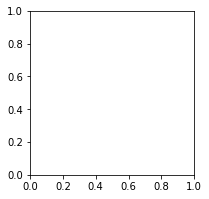

In [ ]:
np.random.seed(123)
# pick a few random test images
for i in range(10):
  j = np.random.randint(0, len(X_te))
  print(i + 1, ":\tinput\t\t      prediction\t\t  target")
  compareinout(j, outim, X_te)
  pl.show()

# the bottleneck layer output

Show the latent representation of the data: 

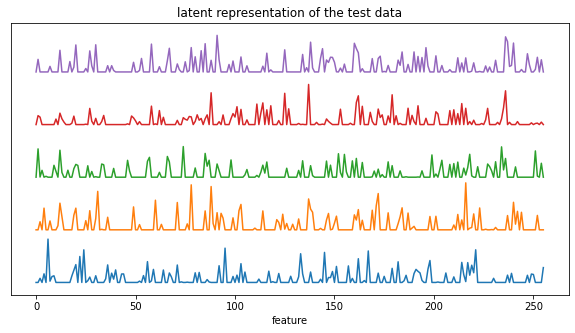

In [ ]:
from keras import backend as K
# input placeholder
inp = model.input                   
# extract the bottle neck outputs
outputs = model.layers[2].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(X_te[:5])
  
for i in range(5):
  pl.plot(layer_outs[0][i] + i)

pl.xlabel("feature")
pl.yticks([],"")
pl.title("latent representation of the test data");

# Test the model on my own image

In [ ]:
imme = Image.open("Kyungmin.jpg")

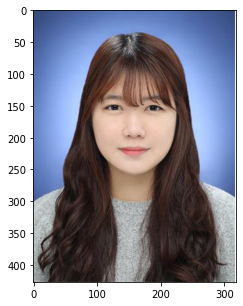

In [ ]:
np_im = numpy.array(imme)[:,:,:3].astype(float) / 255
pl.figure()
#pl.imshow(np_im[50:600,250:700,:] )
pl.imshow(np_im)
np_im[100:625,250:775,:].shape, np.prod(np_im.shape[1:]);

In [ ]:
np_im.shape

(427, 319, 3)

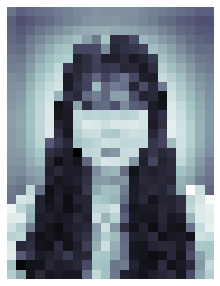

In [ ]:
#low resolution version subsampling by 15
#np_im_me = np_im[100:625,250:775,:][::15,::15,1]

# Lower the resolution
np_im_me = np_im[::15,::15,1]
pl.imshow(np_im_me, cmap="bone")
pl.axis('off');

In [ ]:
#this is the number of pixels in the image
np.prod(np_im_me[0].shape)

22

In [ ]:
np_im_me.shape

(29, 22)

In [ ]:
X_te_me = np.array([np_im_me.flatten()])
outim_me = model.predict(X_te_me)
pl.imshow(outim_me.reshape(22,29), cmap="bone")
pl.axis('off');

ValueError: ignored